**طلب الأول**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
# giving Access For File Has Been Uploaded
from google.colab import drive
#Mounting File
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Recive Data From File
data=pd.read_csv('/content/drive/MyDrive/dataset/vehicles.csv')

In [ ]:
# Checking Data
data.shape



NameError: name 'data' is not defined

In [ ]:
data.head(20)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [ ]:
# Display All Columns For Dataset
data.info('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:

 data.drop(['id', 'url', 'region', 'region_url',
       'model', 'VIN', 'size', 'image_url', 'county', 'state', 'lat', 'long',
       'posting_date',], axis=1, inplace=True)

In [ ]:
# check for duplicated values
data.duplicated().sum()

59217

In [ ]:
# drop duplicated value with inplace true
data.drop_duplicates(inplace=True)

In [ ]:
# updateing datetime for now
import datetime
dateTime=datetime.datetime.now()




In [ ]:
# create AgeValue column and insert year data
data['AgeValue']=dateTime.year-data['year']

In [ ]:
data=data.drop(['year'],axis=1)

In [ ]:
# Removing cylinders word beside the nummber
data['cylinders']=data['cylinders'].str.replace('cylinders','')

In [ ]:
data.info('')

<class 'pandas.core.frame.DataFrame'>
Index: 367663 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         367663 non-null  int64  
 1   manufacturer  353444 non-null  object 
 2   condition     225632 non-null  object 
 3   cylinders     217021 non-null  object 
 4   fuel          365750 non-null  object 
 5   odometer      363943 non-null  float64
 6   title_status  360655 non-null  object 
 7   transmission  365468 non-null  object 
 8   drive         257939 non-null  object 
 9   type          297584 non-null  object 
 10  paint_color   260871 non-null  object 
 11  description   367608 non-null  object 
 12  AgeValue      366938 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 39.3+ MB


In [ ]:
#Ddisplay columns count
for col in data.columns:print (col,":",data[col].nunique())

price : 15655
manufacturer : 42
condition : 6
cylinders : 8
fuel : 5
odometer : 104870
title_status : 6
transmission : 3
drive : 3
type : 13
paint_color : 12
description : 360911
AgeValue : 114


In [ ]:
data.describe()

,price,odometer,AgeValue
count,3.676630e+05,3.639430e+05,366938.000000
mean,8.420852e+04,9.639320e+04,12.829481
std,1.312666e+07,2.120185e+05,9.709302
min,0.000000e+00,0.000000e+00,2.000000
25%,5.900000e+03,3.542300e+04,7.000000
50%,1.399000e+04,8.299400e+04,10.000000
75%,2.599900e+04,1.320000e+05,16.000000
max,3.736929e+09,1.000000e+07,124.000000


In [ ]:
# Display Top 20 Most Type Has Verciles Count
data['type'].value_counts().sort_values(ascending=False)[:20]

,count
type,
sedan,77504
SUV,67659
pickup,37759
truck,30637
other,21038
coupe,17885
hatchback,15451
wagon,9972
van,7415


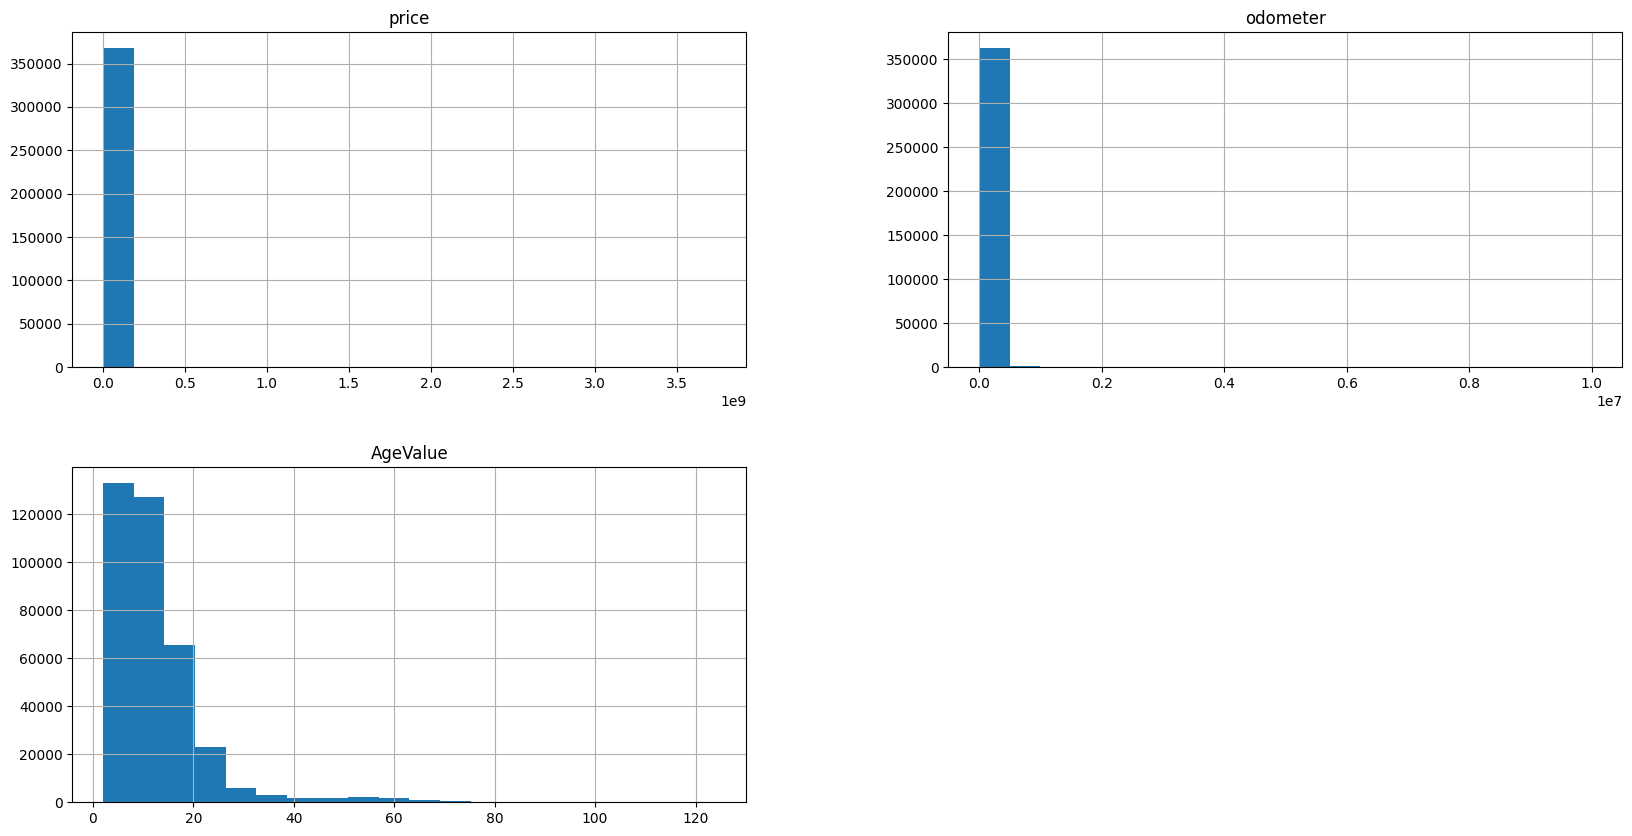

In [ ]:
data.hist(bins=20,figsize=(20,10))
plt.show()

<Axes: xlabel='type'>

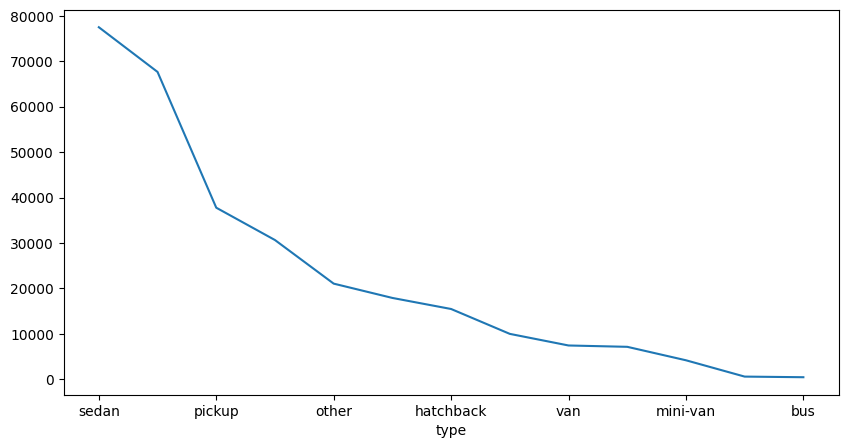

In [ ]:
# Draw Histogram
data['type'].value_counts().sort_values(ascending=False)[:20].plot(figsize=(10,5))

In [ ]:
# لتحديد القيم المتطرفة وإزالتها من مجموعة بيانات باستخدام طريقة النطاق الربعي (IQR)
dataValue=data.select_dtypes(exclude='object')

for column in dataValue:
    querry1=data[column].quantile(0.25)
    querry3=data[column].quantile(0.75)
    iqr=querry3-querry1

    highValue=querry3+1.5*iqr
    lowValue=querry1-1.5*iqr

    outlier=((dataValue[column]>highValue)|(dataValue[column]<lowValue)).sum()
    total=dataValue[column].shape[0]
    print(f"nummber of liners in {column} are :{outlier}-{round(100*(outlier)/total,2)}%")
    #  check outliner greater than 0
    if outlier>0:
     data=data.loc[(data[column]<=highValue) & (data[column]>=lowValue)]

nummber of liners in price are :6367-1.73%
nummber of liners in odometer are :3807-1.04%
nummber of liners in AgeValue are :14616-3.98%


In [ ]:
# Display Null Values
data.isnull().sum()

,0
price,0
manufacturer,9854
condition,130878
cylinders,139686
fuel,1373
odometer,0
title_status,6298
transmission,1461
drive,100663
type,61337


In [ ]:
# data.isnull().sum()/data.shape[0]

In [ ]:
data_object_value=data.select_dtypes(include='object')

In [ ]:
data_numeric_value=data.select_dtypes(exclude='object')

In [ ]:
for column in data.select_dtypes(include=['object']):
    data.loc[:, column] = data[column].fillna(data[column].mode()[0])


In [ ]:
for column in data.select_dtypes(include=['float', 'int']):
    data.loc[:, column] = data[column].fillna(data[column].median())


In [ ]:
#avoid object values
from sklearn.preprocessing import OrdinalEncoder

categorical_col = [ 'manufacturer', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'description']
ordinal_encoder = OrdinalEncoder()
for col in categorical_col:
    data[col ] = ordinal_encoder.fit_transform(data[[col]])


In [ ]:
data[categorical_col] = data[categorical_col].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339634 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         339634 non-null  int64  
 1   manufacturer  339634 non-null  int64  
 2   condition     339634 non-null  int64  
 3   cylinders     339634 non-null  int64  
 4   fuel          339634 non-null  int64  
 5   odometer      339634 non-null  float64
 6   title_status  339634 non-null  int64  
 7   transmission  339634 non-null  int64  
 8   drive         339634 non-null  int64  
 9   type          339634 non-null  int64  
 10  paint_color   339634 non-null  int64  
 11  description   339634 non-null  int64  
 12  AgeValue      339634 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 36.3 MB


In [ ]:
x=data.drop('type',axis=1)
y=data['type']

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split for classification tasks
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print("Shape of x_train:", x_train.shape)


Shape of x_train: (271707, 12)


In [ ]:
print("Shape of x_test:", x_test.shape)

Shape of x_test: (67927, 12)


**الطلب الثاني**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the Logistic Regression model with hyperparameter tuning
ModelOne = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced', random_state=42)

#  Train the model
ModelOne.fit(x_train_scaled, y_train)

# Make predictions
y_pred = ModelOne.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.33597832967744784
Precision: 0.4289132728409902
Recall: 0.33597832967744784
F1 Score: 0.36847000329060003


**الطلب الثالث**

In [ ]:
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#  Separate features and target variable
X = data.drop('type', axis=1)  # Drop the target column 'type'
y = data['type']  # Target variable

#  Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns  # Categorical columns
numeric_cols = X.select_dtypes(include=['float', 'int']).columns  # Numeric columns

#  Create an Imputer for Missing Values

numeric_imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the column mean for numeric columns
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Replace NaNs with the most frequent value for categorical columns
# Create an Imputer for Missing Values
# For numeric columns, we'll use the mean; for categorical, we'll use the most frequent value
numeric_imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the column mean for numeric columns
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Replace NaNs with the most frequent value for categorical columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, numeric_cols),  # Apply mean imputer to numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],  # OneHotEncode categorical columns
    remainder='passthrough')  # Leave other columns as they are

#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Fit the preprocessor on training data and transform both train and test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:


#  Train the Decision Tree Classifier
modelTwo = tree.DecisionTreeClassifier(random_state=42)
modelTwo.fit(X_train_transformed, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = modelTwo.predict(X_test_transformed)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7123529671559173
Precision: 0.4289132728409902
Recall: 0.33597832967744784
F1 Score: 0.36847000329060003


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339634 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         339634 non-null  int64  
 1   manufacturer  339634 non-null  int64  
 2   condition     339634 non-null  int64  
 3   cylinders     339634 non-null  int64  
 4   fuel          339634 non-null  int64  
 5   odometer      339634 non-null  float64
 6   title_status  339634 non-null  int64  
 7   transmission  339634 non-null  int64  
 8   drive         339634 non-null  int64  
 9   type          339634 non-null  int64  
 10  paint_color   339634 non-null  int64  
 11  description   339634 non-null  int64  
 12  AgeValue      339634 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 36.3 MB


**الطلب الرابع**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Gaussian Naive Bayes model
ModelThree = GaussianNB()

# Train the model
ModelThree.fit(x_train, y_train_encoded)

# Make predictions
y_pred = ModelThree.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.39738248413738275
Precision: 0.15791283869919726
Recall: 0.39738248413738275
F1 Score: 0.22601233447788396


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
